<a href="https://colab.research.google.com/github/chl-eo/CCADMACL_EXERCISES_COM222/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [123]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [124]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

1. Use any filter method to select the best features

In [125]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

In [126]:
df_house = fetch_california_housing()
df_house_features = pd.DataFrame(df_house.data, columns=df_house.feature_names)
df_house_target = pd.DataFrame(df_house.target, columns=['target'])

In [127]:
df_house_target

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [128]:
selector = VarianceThreshold(threshold=0.2) # Variance threshold
sel = selector.fit(df_house_features)
sel_index = sel.get_support()
df_house_norm_vt = df_house_features.iloc[:, sel_index]

In [129]:
df_house_norm_vt

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Mutual Info

In [130]:
from sklearn.feature_selection import mutual_info_regression

threshold = 5  # the number of most relevant features
high_score_features = []
# Use mutual_info_regression for continuous target variables
feature_scores = mutual_info_regression(df_house_features, df_house_target.values.ravel(), random_state=0)

In [131]:
from sklearn.feature_selection import mutual_info_regression

threshold = 5  # the number of most relevant features
high_score_features = []
# Use mutual_info_regression for continuous target variables
feature_scores = mutual_info_regression(df_house_features, df_house_target.values.ravel(), random_state=0)

for score, f_name in sorted(zip(feature_scores, df_house_features.columns), reverse=True)[:threshold]:
    print(f_name, score)
    high_score_features.append(f_name)

# Check if the selected features are in the dataframe
# This is a diagnostic step. Remove after debugging
missing_features = [f for f in high_score_features if f not in df_house_features.columns]
if missing_features:
    print(f"Warning: These features are not in the dataframe: {missing_features}")
    # Handle missing features here. For example, exclude them from high_score_features:
    high_score_features = [f for f in high_score_features if f in df_house_features.columns]

# Extract the subset of the dataframe
df_house_norm_mic = df_house_features[high_score_features]

Longitude 0.4018195828289901
MedInc 0.38764599736258987
Latitude 0.3706566756286751
AveRooms 0.10362300978707584
AveOccup 0.07254907984228254


In [132]:
df_house_norm_mic.columns

Index(['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup'], dtype='object')

F Classifier

In [133]:
from sklearn.feature_selection import f_classif

threshold = 5 # the number of most relevant features
high_score_features = []
feature_scores = f_classif(df_house_features, df_house_target.values.ravel())[0]

In [134]:
from sklearn.feature_selection import f_classif

threshold = 5  # the number of most relevant features
# Initialize an empty list to store high-scoring features FOR THIS ANALYSIS
high_score_features = []
feature_scores = f_classif(df_house_features, df_house_target.values.ravel())[0]

for score, f_name in sorted(zip(feature_scores, df_house_features.columns), reverse=True)[:threshold]:
    # print(f_name, score)
    high_score_features.append(f_name)

df_house_fc = df_house_features[high_score_features]
df_house_fc.columns

Index(['MedInc', 'Latitude', 'Population', 'HouseAge', 'Longitude'], dtype='object')

KBest

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # Change to f_classif

threshold = 5  # the number of most relevant features
skb = SelectKBest(score_func=f_classif, k=threshold) # Use f_classif instead of chi2
sel_skb = skb.fit(df_house_features, df_house_target)
sel_skb_index = sel_skb.get_support()
df_house_skb = df_house_features.iloc[:, sel_skb_index]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
print('p_values', sel_skb.pvalues_)
print(df_house_skb.columns)

p_values [0.00000000e+00 6.38025480e-06 1.00000000e+00 1.00000000e+00
 2.51921352e-13 1.00000000e+00 4.56019174e-21 1.41935027e-02]
Index(['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude'], dtype='object')


In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corr_with_label = 0.05  #correlation threshold for target
corr_between_features = 0.65 #correlation threshold between features

df_house_combined = pd.concat([df_house_features, df_house_target], axis=1)

In [138]:
corr_with_label = 0.05  #correlation threshold for target
corr_between_features = 0.65 #correlation threshold between features
cor = df_house_combined.corr()

# drop less correlated ones with target
corr_target = abs(cor['target'])
relevant_features = corr_target[corr_target > corr_with_label]
df_house_corr = df_house_combined[list(relevant_features.index)]

df_house_corr.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'target'], dtype='object')

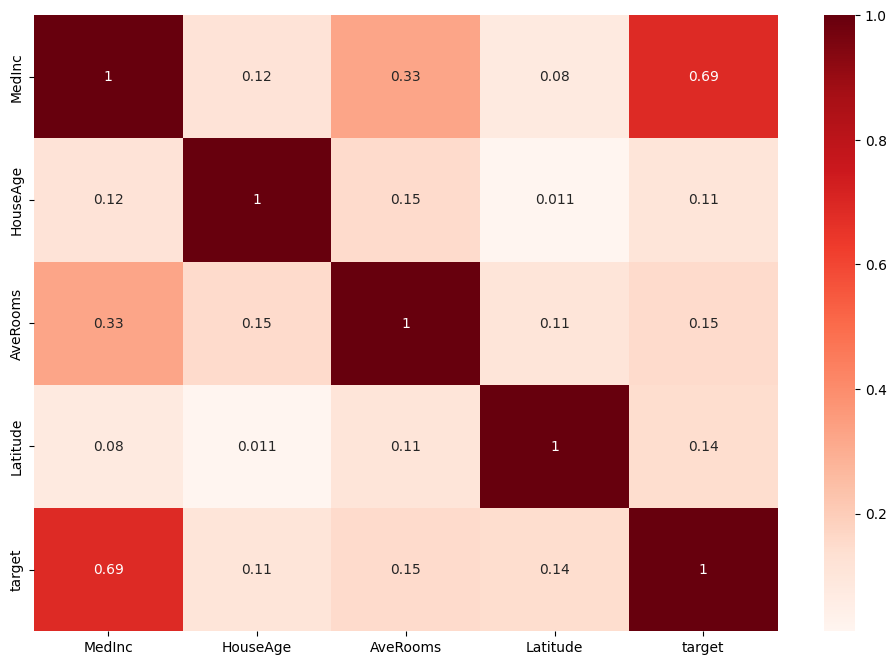

('df_house_corr',
 Index(['MedInc', 'HouseAge', 'AveRooms', 'Latitude'], dtype='object'))

In [139]:
cor = df_house_corr.corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# drop highly correlated features
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
df_house_corr = df_house_corr.drop(df_house_corr[to_drop], axis=1)
df_house_corr = df_house_corr[[cols for cols in df_house_corr.columns if cols != 'quality']]
'df_house_corr', df_house_corr.columns

2. Use any wrapper method to select the best features

In [140]:
from sklearn.ensemble import RandomForestRegressor # Changed to RandomForestRegressor
from sklearn.feature_selection import RFE

threshold = 5 # the number of most relevant features
# Changed model to RandomForestRegressor for continuous target
model_rf = RandomForestRegressor(n_estimators=500, random_state=0, max_depth = 3)
selector = RFE(model_rf, n_features_to_select=5, step=1)

selector = selector.fit(df_house_features, df_house_target.values.ravel())
selector_ind = selector.get_support()
df_house_rfe = df_house_features.iloc[:, selector_ind]
df_house_rfe.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude'], dtype='object')

3. Use any embedded methood to select the best features

In [141]:
from sklearn.feature_selection import SelectFromModel

model_rf = RandomForestRegressor(n_estimators=500, random_state=0, max_depth = 3)
model_rf.fit(df_house_features, df_house_target.values.ravel())

sel_sfm = SelectFromModel(model_rf, prefit=True)
sel_sfm_index = sel_sfm.get_support()
df_house_sfm = df_house_features.iloc[:, sel_sfm_index]
df_house_sfm.columns

Index(['MedInc', 'AveOccup'], dtype='object')

Model Training

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train_random_forest_regressor(df, target, test_size=0.2, random_state=42):

    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=test_size, random_state=random_state)

    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    metrics = {
        'R² Score': r2,
        'RMSE': rmse
    }

    return model, metrics

In [143]:
model_vt, metrics_vt = train_random_forest_regressor(df_house_norm_vt, df_house_target)
print(metrics_vt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'R² Score': 0.8051230593157366, 'RMSE': 0.5053399773665033}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [144]:
model_vt, metrics_mic = train_random_forest_regressor(df_house_norm_mic, df_house_target)
print(metrics_mic)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'R² Score': 0.8117171398417119, 'RMSE': 0.4967167708063585}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [145]:
model_vt, metrics_fc = train_random_forest_regressor(df_house_fc, df_house_target)
print(metrics_fc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'R² Score': 0.8131179166841424, 'RMSE': 0.4948655977631337}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [146]:
model_vt, metrics_corr = train_random_forest_regressor(df_house_corr, df_house_target)
print(metrics_corr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'R² Score': 0.6332976438093527, 'RMSE': 0.6932027552558605}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
